In [2]:
%matplotlib inline
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

#load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)

In [3]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , x_train.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", y_train.shape)

Image Data Shape (60000, 28, 28)
Label Data Shape (60000,)


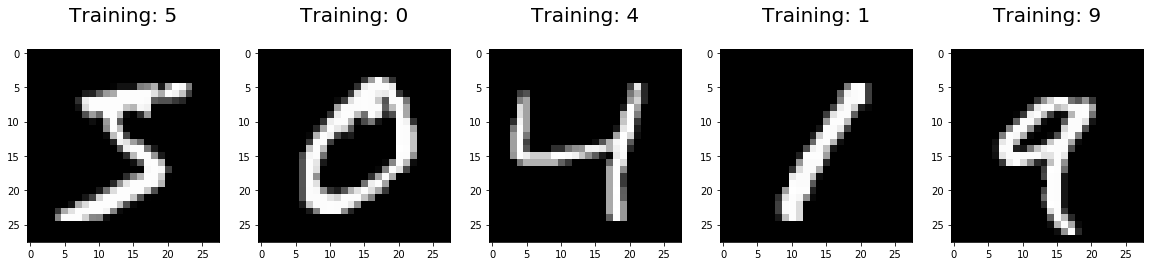

In [11]:
import numpy as np 
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [7]:
x_train.shape
x_test.shape

(10000, 784)

In [16]:
def logisticModel(solver = 'lbfgs',multi_class = 'auto' , max_iter  = 100, C = 1.0):
    logisticRegr = LogisticRegression(solver = solver,multi_class =  multi_class,max_iter  = max_iter,C=C)
    return logisticRegr

In [20]:
logisticRegr = logisticModel()
logisticRegr.fit(x_train,y_train)
score = logisticRegr.score(x_train,y_train)
print(score)

/home/shivam/virtual_env/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9339166666666666


In [26]:
iters = [0.001,0.5,1.0,5,100]
ans=[]
ans2 = []
print (iters)
for x in iters:
    logisticRegr = logisticModel(C = x)
    logisticRegr.fit(x_train, y_train)
    score = logisticRegr.score(x_test, y_test)
    score2 = logisticRegr.score(x_train,y_train)
    print(score)            
    print(score2)
    ans.append(score)
    ans2.append(score2)
print(ans)
print(ans2)

[0.001, 0.5, 1.0, 5, 100]


/home/shivam/virtual_env/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.924
0.9344166666666667


/home/shivam/virtual_env/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9241
0.9338833333333333


/home/shivam/virtual_env/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9255
0.9339166666666666


/home/shivam/virtual_env/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9245
0.9338166666666666


/home/shivam/virtual_env/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9242
0.9339166666666666
[0.924, 0.9241, 0.9255, 0.9245, 0.9242]
[0.9344166666666667, 0.9338833333333333, 0.9339166666666666, 0.9338166666666666, 0.9339166666666666]


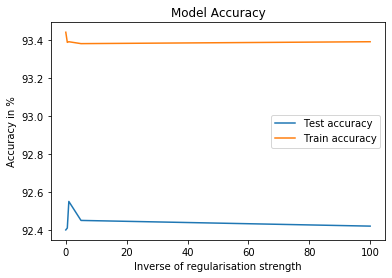

In [25]:
plt.plot(iters,ans)
legend = [];
legend.append('Test accuracy')
plt.plot(iters,ans2)
legend.append('Train accuracy')
plt.xlabel('Inverse of regularisation strength')
plt.ylabel('Accuracy in %')
plt.title('Model Accuracy')
plt.legend(legend, loc='best')


In [ ]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

In [ ]:
logisticRegr.predict(x_test[0:10])

In [ ]:
y_test[0:10]

In [ ]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

In [ ]:
import numpy as np 

import seaborn as sns
from sklearn import metrics


In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();


In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
plt.savefig('toy_Digits_ConfusionMatplotlibCodementor.png')